In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest, ttest_ind, shapiro, norm, f_oneway, levene
from google.colab import drive
drive.mount('/content/drive') #подключаем гугл коллаб

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sworks = pd.read_csv('/content/drive/My Drive/EkoNiva/works_ver3.csv', encoding='1251', sep=';', decimal=',')
works = works.drop_duplicates()
works.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,Unnamed: 13,Unnamed: 14,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F


In [ ]:
shapiro(works['proc_depth']), kstest(works['proc_depth'], 'norm')

(ShapiroResult(statistic=nan, pvalue=nan),
 KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan))

In [ ]:
dt = works.groupby('field')['proc_depth'].median()
works['depth'] = works['field'].apply(lambda x:dt[x])

In [ ]:
for col in ['yield_fact', 'depth']:
    if works[col].isna().any(axis=0): # если значение количества NaN'ов больше 0, то выводим эти значения
        print(f'{col}: {works[col].isna().sum()}')

depth: 15810


In [ ]:
works = works[works['yield_fact'] > 0]

In [ ]:
works.shape

(36398, 21)

In [ ]:
for col in ['yield_fact', 'depth']:
    if works[col].isna().any(axis=0): # если значение количества NaN'ов больше 0, то выводим эти значения
        print(f'{col}: {works[col].isna().sum()}')

depth: 5489


In [ ]:
works = works[['yield_fact', 'depth']]
works = works.dropna()

In [ ]:
works.shape

(30909, 2)

Возмонжно, можно углубить и для каждой культуры найти нормальную глубину обработки

---



In [ ]:
works['yield_fact'].value_counts()

,count
yield_fact,
1.18,148
2.94,144
1.16,143
1.46,142
1.41,141
...,...
9044.63,1
8824.18,1
6574.72,1


In [ ]:
works['depth'].value_counts()

,count
depth,
5.00,6966
10.00,3449
8.00,2041
15.00,1663
20.00,1650
...,...
3.25,3
20.50,3
31.50,3


Text(0.5, 1.0, 'Урожайность')

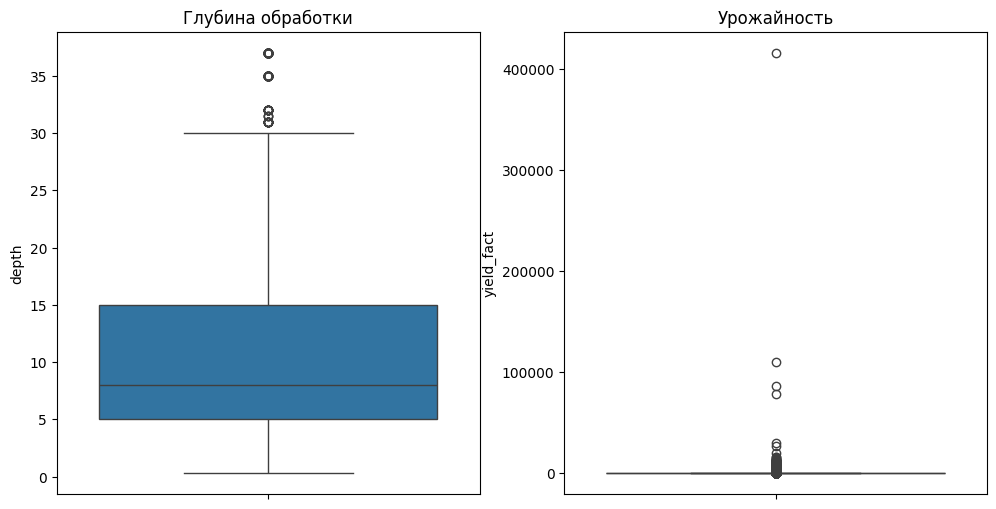

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(works['depth'], ax=ax[0])
sns.boxplot(works['yield_fact'])
ax[0].set_title('Глубина обработки')
ax[1].set_title('Урожайность')

(30909, 2)
(25197, 2)


<ipython-input-340-88a63bad57c5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  works_ = works_[(works['depth'] >= meann_d - iqr_d) & (works['depth'] <= meann_d + iqr_d)]


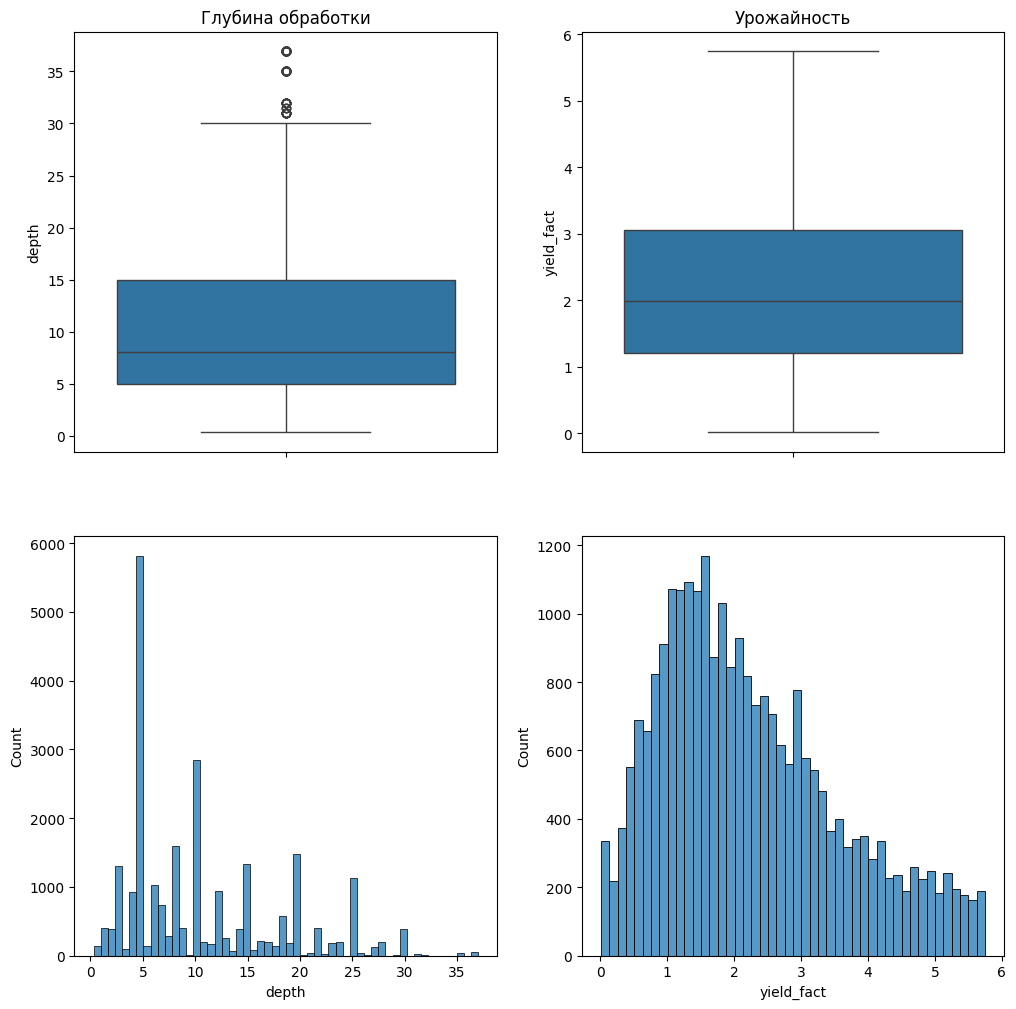

In [ ]:
works_ = works.copy()
'''meann_f = works_['yield_fact'].mean()
iqr_f = 3 * (works_['yield_fact'].quantile(0.75) - works_['yield_fact'].quantile(0.25))
print(meann_f, iqr_f)'''
meann_d = works_['depth'].mean()
iqr_d = 3 * (works_['depth'].quantile(0.75) - works_['depth'].quantile(0.25))
print(works_.shape)
block = works_['yield_fact'].quantile(0.815)
works_ = works_[works_['yield_fact'] <= block]
works_ = works_[(works['depth'] >= meann_d - iqr_d) & (works['depth'] <= meann_d + iqr_d)]
print(works_.shape)
#works = works[(works['yield_fact'] >= works['yield_fact'].quantile(0.01)) & (works['depth'] <= works['depth'].quantile(0.99))]
f, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.boxplot(works_['depth'], ax=ax[0][0])
sns.boxplot(works_['yield_fact'], ax=ax[0][1])
sns.histplot(works_['depth'], ax=ax[1][0])
sns.histplot(works_['yield_fact'], ax=ax[1][1])
ax[0][0].set_title('Глубина обработки')
ax[0][1].set_title('Урожайность')
plt.show()

<Axes: xlabel='depth', ylabel='yield_fact'>

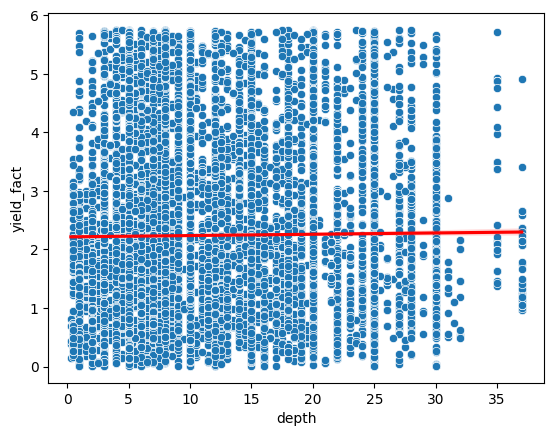

In [ ]:
sns.scatterplot(x=works_['depth'], y=works_['yield_fact'])
sns.regplot(x=works_['depth'], y=works_['yield_fact'], scatter=False, color='red', label='Линия регрессии')

In [ ]:
works_.corr()['depth']['yield_fact']

0.012243267511480704

In [ ]:
works_.shape

(25197, 2)

In [ ]:
works = works_.sort_values('depth')
works_1 = works.iloc[:works.shape[0] // 5 + 1, :]
works_2 = works.iloc[works.shape[0] // 5 + 1:works.shape[0] // 5 * 2 + 1, :]
works_3 = works.iloc[works.shape[0] // 5 * 2 + 1:works.shape[0] // 5 * 3 + 1, :]
works_4 = works.iloc[works.shape[0] // 5 * 3 + 1:works.shape[0] // 5 * 4 + 1, :]
works_5 = works.iloc[works.shape[0] // 5 * 4 + 1:, :]

In [ ]:
def check_hypothesis_anova(*args, alpha=0.05):
    f_stat, p_value = f_oneway(*args)

    # Проверка нулевой гипотезы
    if p_value < alpha:
        conclusion = "Отвергаем нулевую гипотезу: Средние значения групп различаются."
    else:
        conclusion = "Не удается отвергнуть нулевую гипотезу: Средние значения групп не различаются."

    return f_stat, p_value, conclusion
f_stat, p_value, conclusion = check_hypothesis_anova(works_1['yield_fact'], works_2['yield_fact'], works_3['yield_fact'], works_4['yield_fact'],
                                                     works_5['yield_fact'])
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
print(conclusion)

F-statistic: 42.0536, p-value: 0.0000
Отвергаем нулевую гипотезу: Средние значения групп различаются.


Найк про